In [20]:
#basic imports
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
sns.set_palette('viridis')
mpl.rcParams['figure.figsize'] = 6,4


📊 Learn About Data 📈

About Dataset
The dataset comprises detailed information on 2,392 high school students. It offers a comprehensive view of student life, including demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, categorizes students based on their grades, making it a valuable resource for educational research, predictive modeling, and statistical analysis.

DATASET LINK
Columns in Dataset:
1. Student ID -> A unique identifier assigned to each student (1001 to 3392).
2. Age -> The age of the students ranges from 15 to 18 years.
3. Gender -> Gender of the students, where 0 represents Male and 1 represents Female.
4. Ethnicity -> The ethnicity of the students, coded as follows: 0: Caucasian 1: African American 2: Asian 3: Other
5. Parental Education -> The education level of the parents, coded as follows: 0: None 1: High School 2: Some College 3: Bachelor's 4: Higher
6. Study Time Weekly -> Weekly study time in hours, ranging from 0 to 20.
7. Absences -> Number of absences during the school year, ranging from 0 to 30.
8. Tutoring -> Tutoring status, where 0 indicates No and 1 indicates Yes.
9. Parental Support -> The level of parental support, coded as follows: 0: None 1: Low 2: Moderate 3: High 4: Very High
10. Extracurricular -> Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
11. Sports -> Participation in sports, where 0 indicates No and 1 indicates Yes.
12. Music -> Participation in music activities, where 0 indicates No and 1 indicates Yes.
13. Volunteering -> Participation in volunteering, where 0 indicates No and 1 indicates Yes.

Target variable:
1. GPA -> Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

In [8]:
df = pd.read_csv('/Users/parthrajauria/Documents/MYPersonalProjects/EndToEndMLOPsProject/notebook/data/Student_performance_data _.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [9]:
## Finding the number of classes in target variable
df['GradeClass'].value_counts()

4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: GradeClass, dtype: int64

In [10]:
df.shape


(2392, 15)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [12]:
df.isnull().sum()


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [13]:
df.duplicated().sum()


0

In [14]:
df.nunique()


StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

In [15]:
df.describe()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [16]:
# Target Variable would be GPA
df.drop(['GradeClass','StudentID'], axis=1, inplace=True)
df.head()


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [17]:
df.shape


(2392, 13)

* The dataset contains a total of 2,392 observations.
* All values in the dataset are non-null and numerical.
* There are no duplicate records.
* Our target variable is `GPA`, that is why `GradeClass` column should be dropped, as these columns give similar information.
* After removing the `StudentID` and `GPA` columns, the dataset consists of 13 columns.

In [18]:
df.columns


Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA'],
      dtype='object')

# 4.1 CATEGORICAL COLUMNS - EDA¶


In [19]:
# Identify categorical columns: columns that are not numerical
categorical_feature = [feature for feature in df.columns if len(df[feature].unique()) <= 5]
print("Categorical Variables Count: {}".format(len(categorical_feature)))


Categorical Variables Count: 10


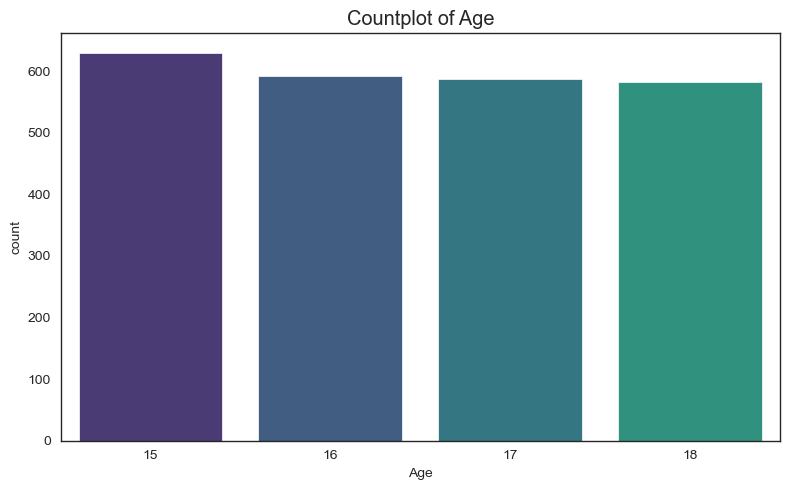

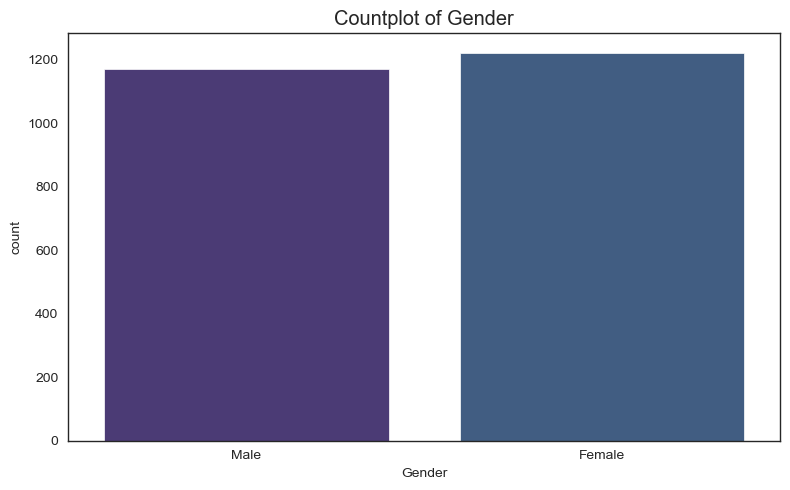

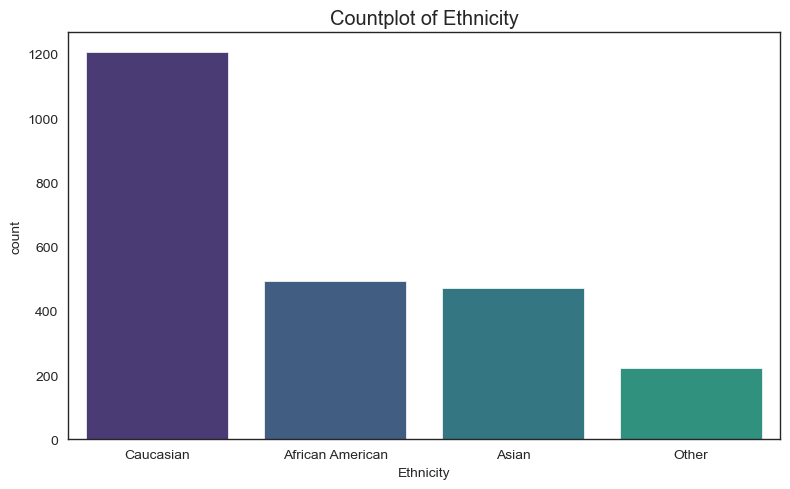

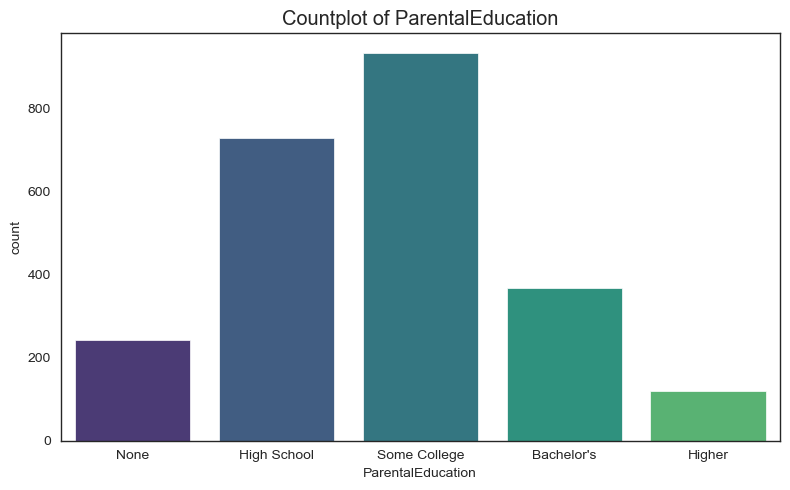

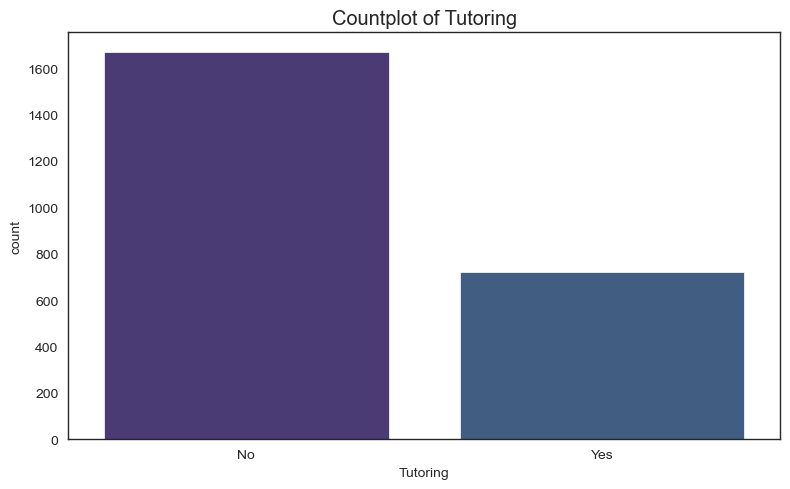

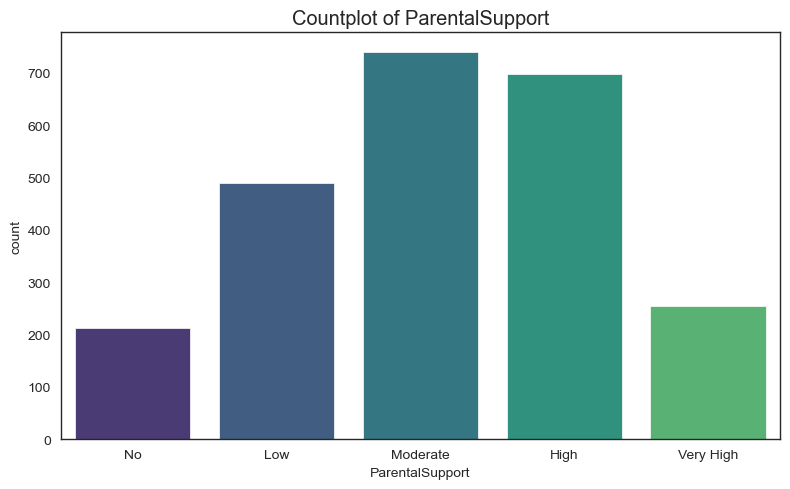

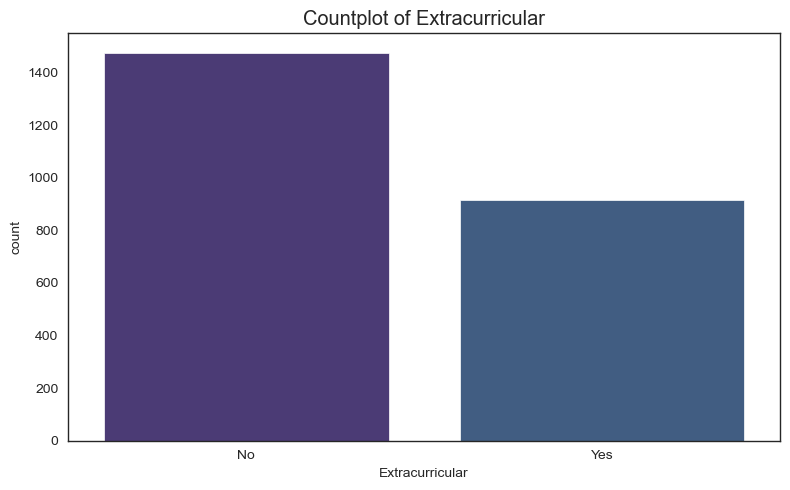

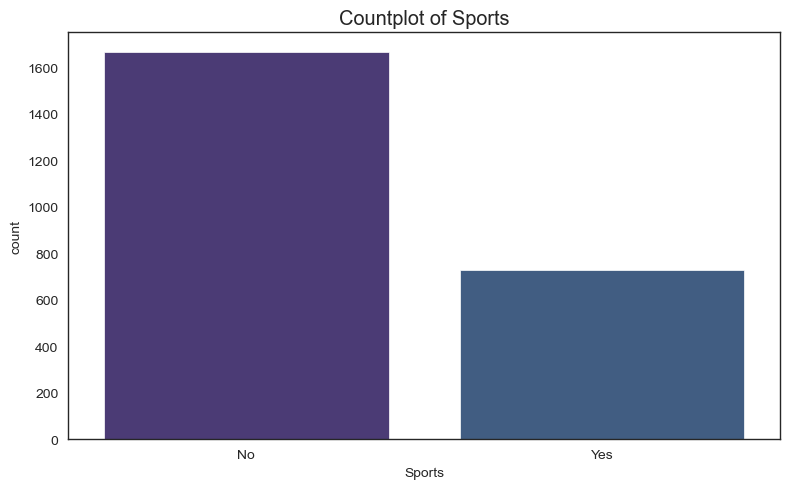

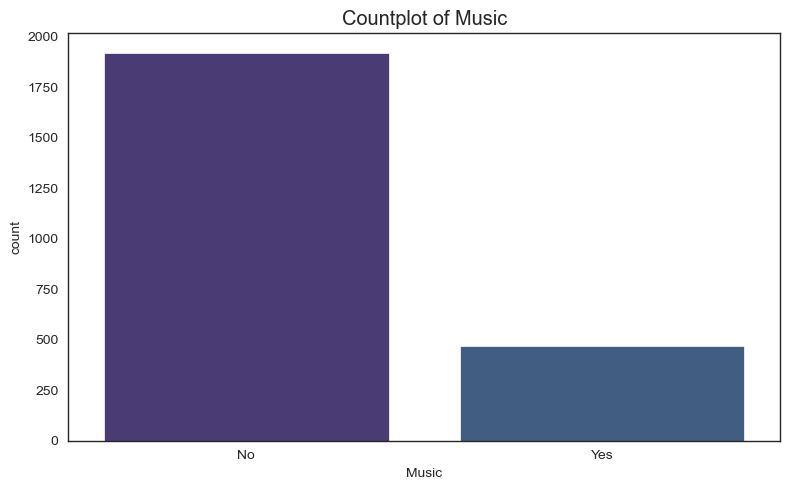

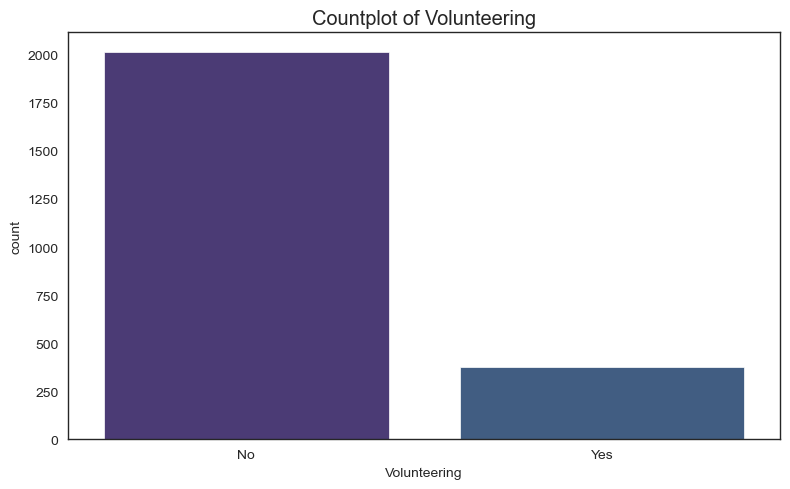

In [21]:
# Custom labels for the categorical columns
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

# Plot countplots for each categorical column
for column in categorical_feature:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.tight_layout()
    plt.show()

* The dataset includes a Uniform Distribution of individuals between the ages of 15 and 18.
* Gender distribution is evenly split between males and females.
* The predominant demographic group in the data is Caucasian.
* A significant portion of the sample population does not engage in any extracurricular activities.
* Parental support levels exhibit a typical bell-curve distribution, centered around average support levels.
* The majority of parents have completed some college coursework, with high school diplomas and bachelor's degrees following in frequency.

# 4.2 NUMERICAL COLUMNS (DISCRETE VARIABLES) - EDA¶


In [22]:
discrete_feature = [feature for feature in df.columns if len(df[feature].unique()) < 25 and feature not in categorical_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


# 4.3 NUMERICAL COLUMNS (CONT VARIABLES) - EDA¶


In [23]:
continuous_feature=[feature for feature in df.columns if feature not in discrete_feature+categorical_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [24]:
continuous_feature

['StudyTimeWeekly', 'Absences', 'GPA']

In [25]:
df[continuous_feature].head()


,StudyTimeWeekly,Absences,GPA
0,19.833723,7,2.929196
1,15.408756,0,3.042915
2,4.210570,26,0.112602
3,10.028829,14,2.054218
4,4.672495,17,1.288061


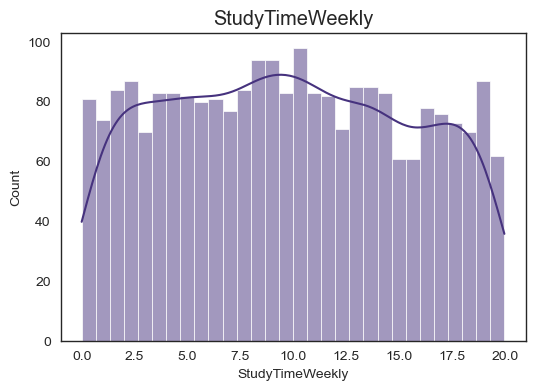

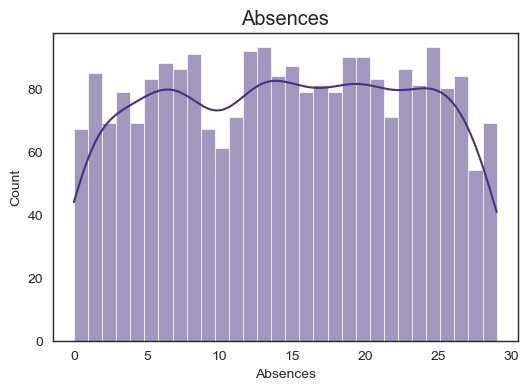

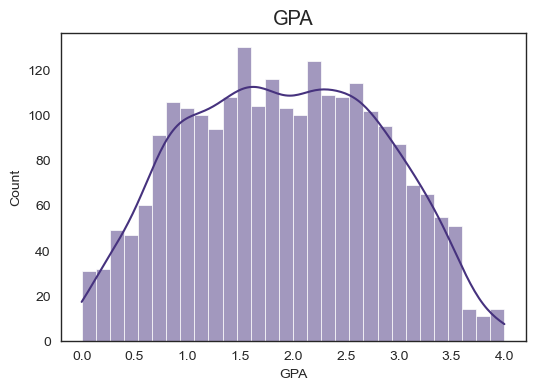

In [26]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data = df.copy()
    sns.histplot(data = data, x = data[feature], bins = 30, kde = True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

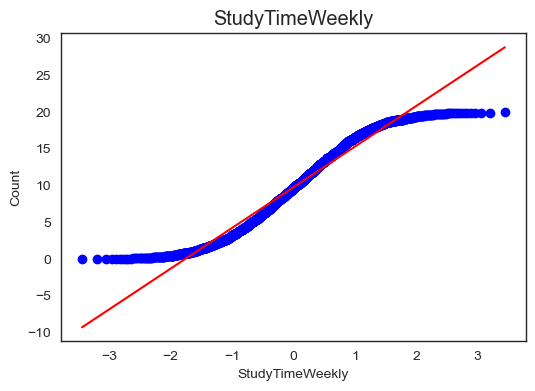

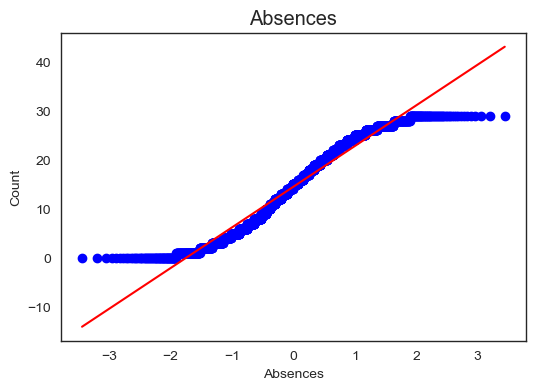

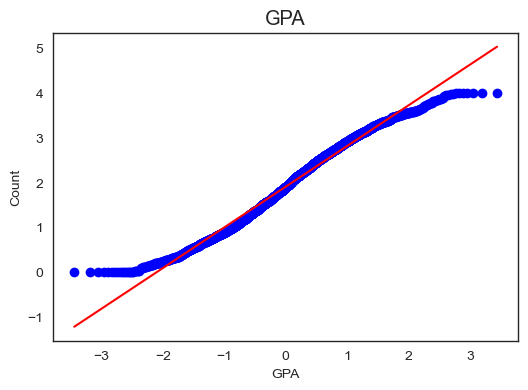

In [27]:

for feature in continuous_feature:
    data = df.copy()
    stats.probplot(df[feature], dist = "norm", plot = plt)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

* The distribution of absences is highly variable. There is no clear pattern but significant fluctuations.
* The probability distribution of studytimeweekly and absences is not uniform but we can some uniformity in the target column - GPA

# 4.4 OUTLIER DETECTION¶


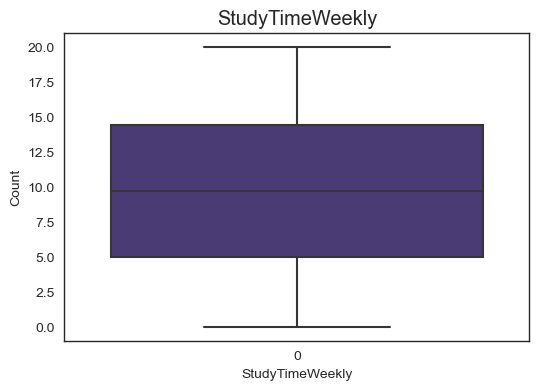

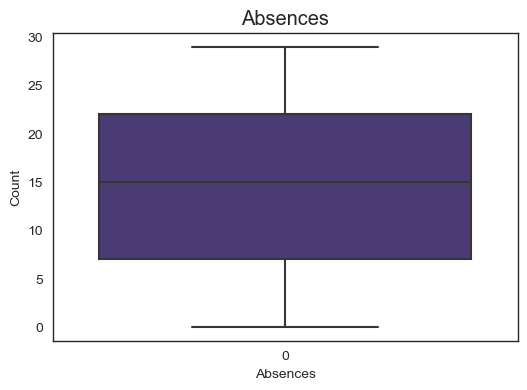

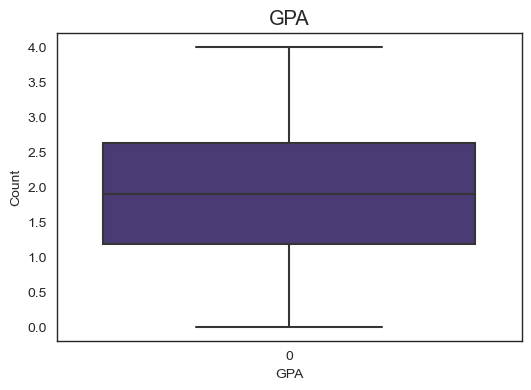

In [28]:
for feature in continuous_feature:
    data = df.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


* There are no outliers in the dataset.



# 4.5 EXAMINING CORRELATION¶


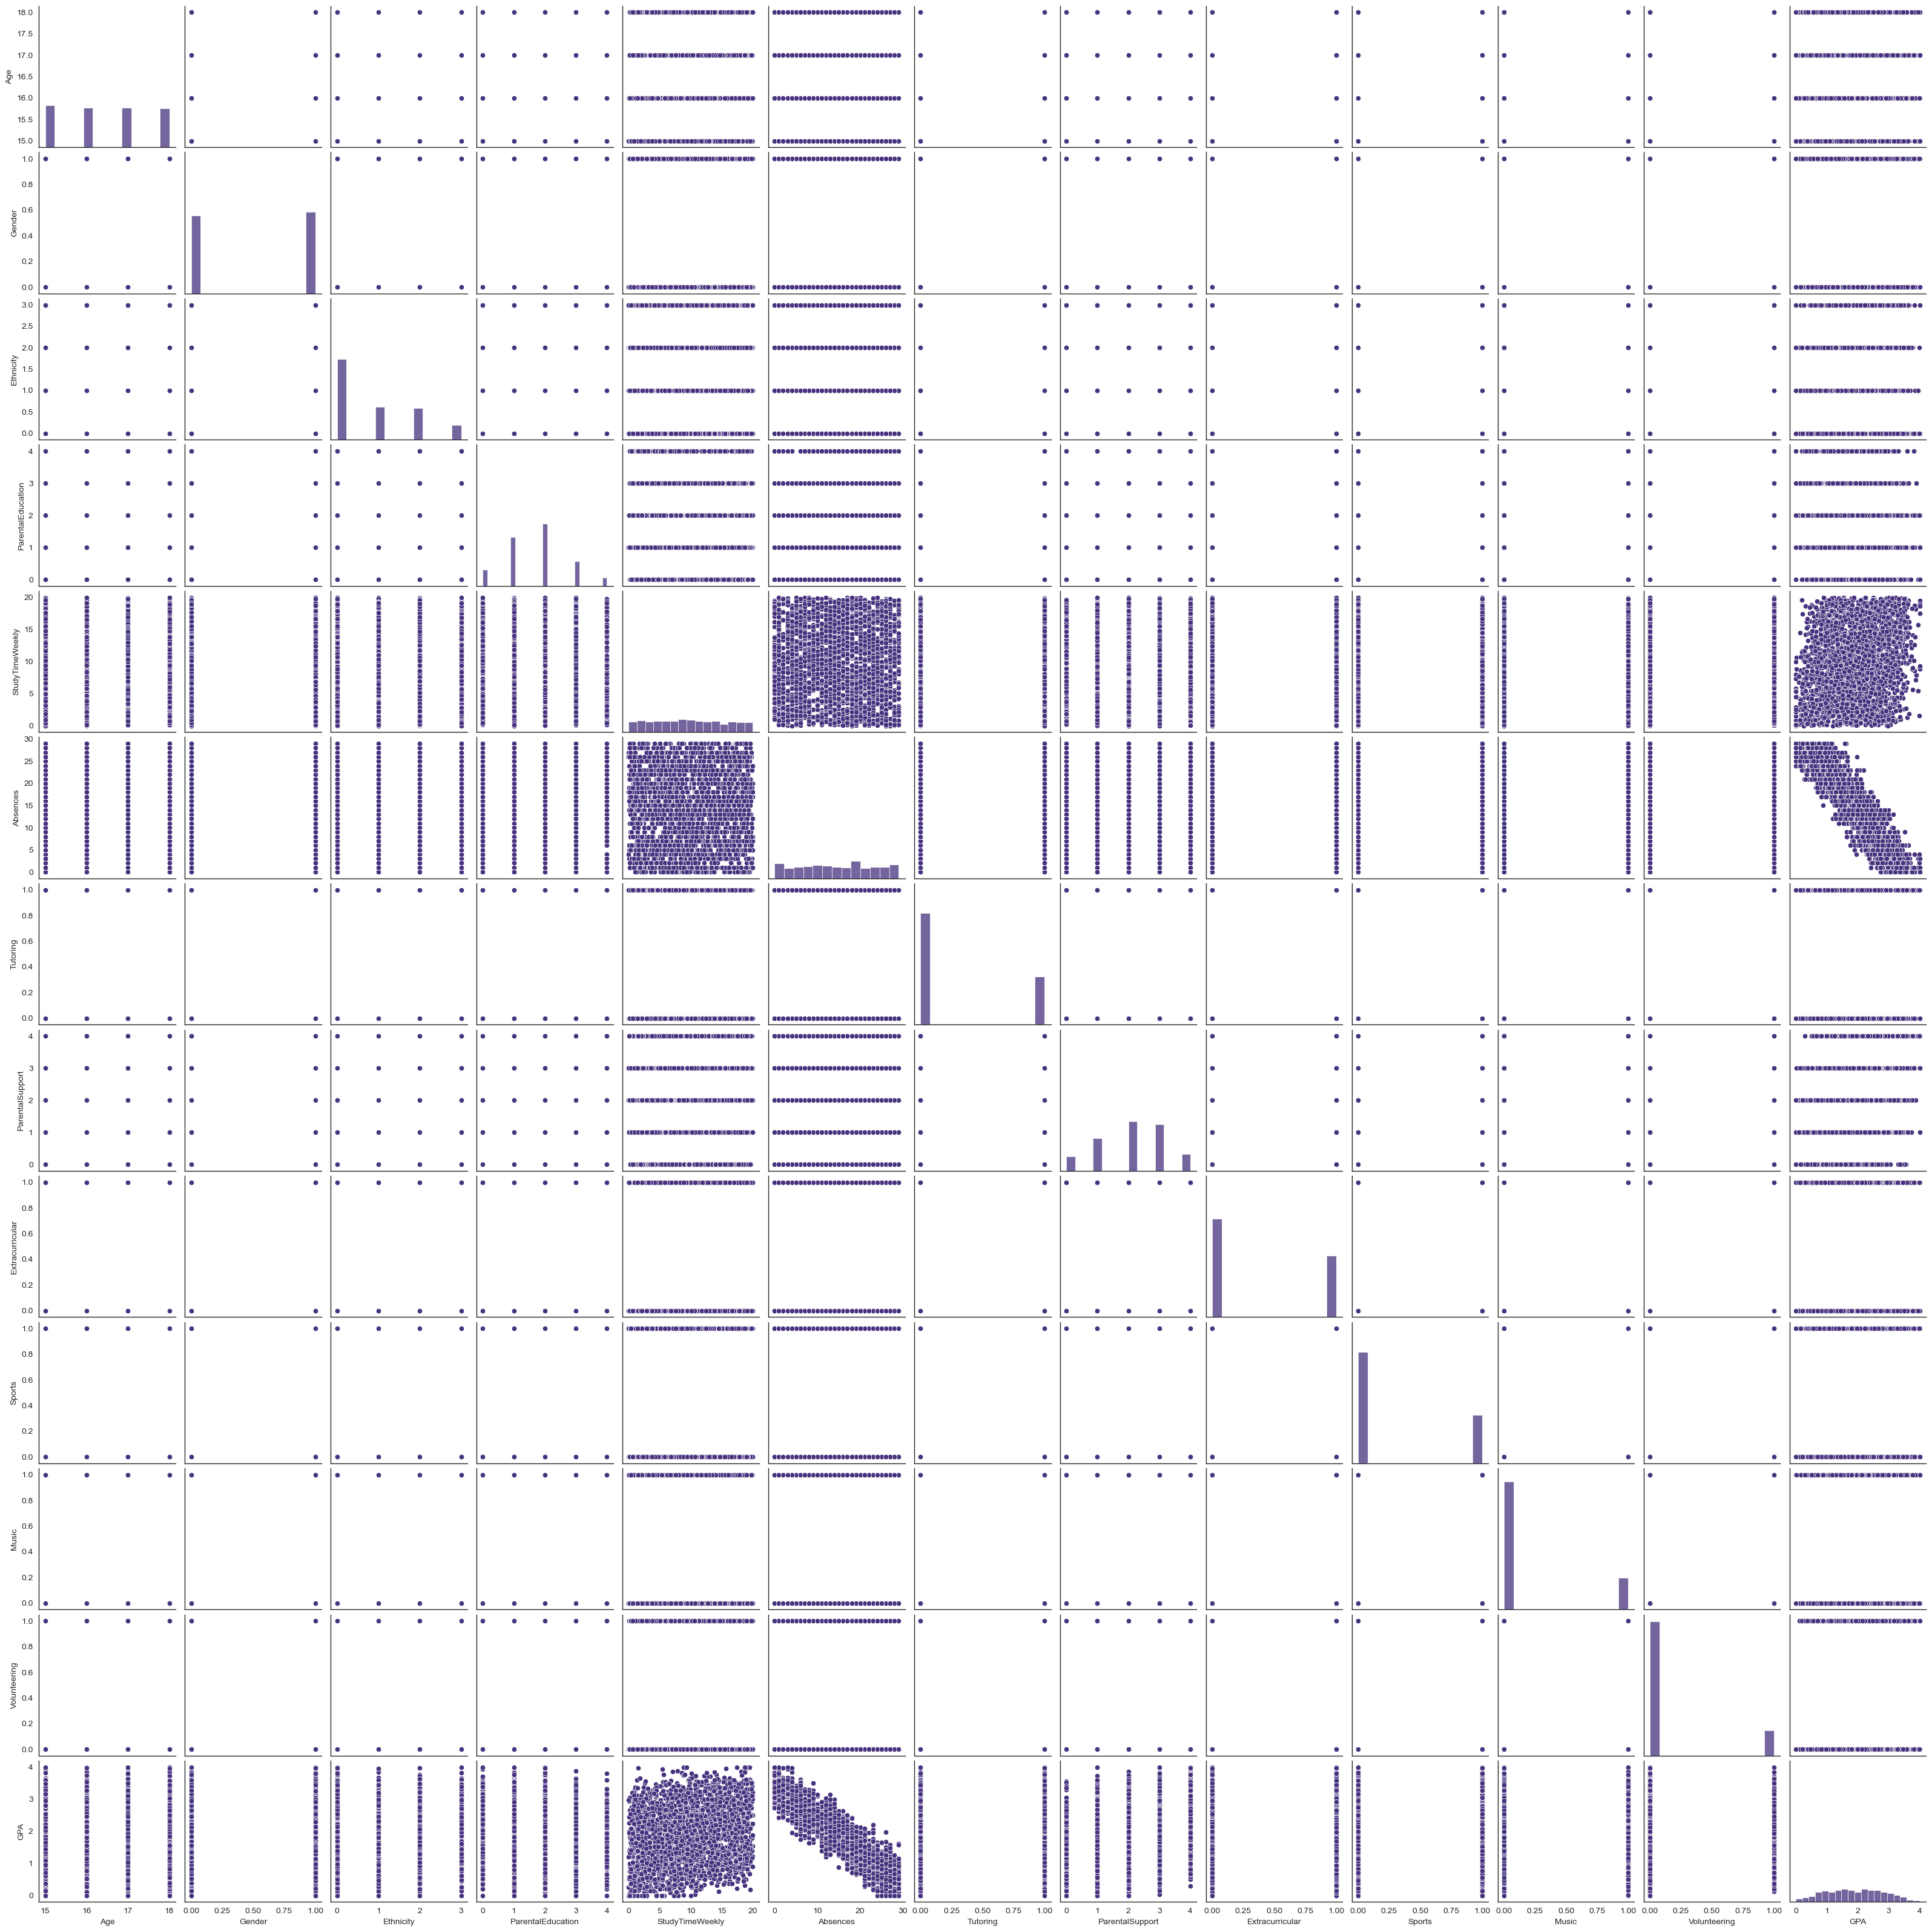

In [29]:
sns.pairplot(df)
plt.show()

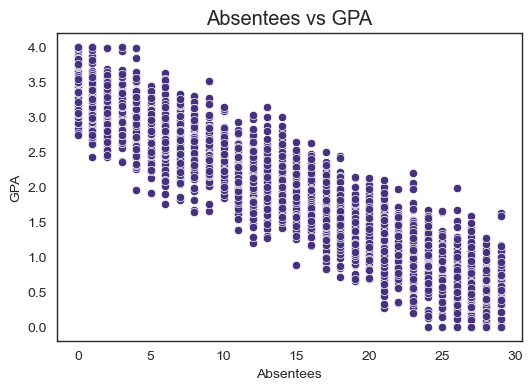

In [30]:
sns.scatterplot(x = df['Absences'], y = df['GPA'], data = df)
plt.xlabel('Absentees')
plt.ylabel('GPA')
plt.title('Absentees vs GPA')
plt.show()

In [31]:
df_corr = df.corr(numeric_only = True)
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df_corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
Age,1.000,0.045,-0.028,0.025,-0.007,-0.012,-0.012,0.033,-0.025,-0.046,-0.003,0.013,0.000
Gender,0.045,1.000,0.016,0.007,0.011,0.021,-0.032,0.008,-0.006,-0.009,0.007,-0.000,-0.013
Ethnicity,-0.028,0.016,1.000,0.034,0.007,-0.026,-0.017,0.021,-0.009,-0.004,-0.015,0.013,0.028
ParentalEducation,0.025,0.007,0.034,1.000,-0.011,0.037,-0.017,-0.017,0.007,0.002,0.039,0.012,-0.036
StudyTimeWeekly,-0.007,0.011,0.007,-0.011,1.000,0.009,0.029,0.036,-0.023,0.007,0.008,-0.017,0.179
Absences,-0.012,0.021,-0.026,0.037,0.009,1.000,-0.016,0.002,0.000,0.041,-0.009,-0.019,-0.919
Tutoring,-0.012,-0.032,-0.017,-0.017,0.029,-0.016,1.000,-0.001,0.005,0.006,-0.011,-0.051,0.145
ParentalSupport,0.033,0.008,0.021,-0.017,0.036,0.002,-0.001,1.000,-0.008,-0.006,0.035,-0.006,0.191
Extracurricular,-0.025,-0.006,-0.009,0.007,-0.023,0.000,0.005,-0.008,1.000,-0.012,-0.014,-0.007,0.094
Sports,-0.046,-0.009,-0.004,0.002,0.007,0.041,0.006,-0.006,-0.012,1.000,-0.020,-0.003,0.058


In [32]:
# Calculate the correlation with the Grade Class and find the strongest correlation
gpa_class_corr = df.corr(numeric_only=True)['GPA'].drop('GPA')
strongest_positive_correlation = gpa_class_corr.idxmax()
strongest_positive_correlation_value = gpa_class_corr.max()
strongest_negative_correlation = gpa_class_corr.idxmin()
strongest_negative_correlation_value = gpa_class_corr.min()

print(f"The strongest positive correlation with the GPA is {strongest_positive_correlation} with a value of {strongest_positive_correlation_value:.2f}")
print(f"The strongest negative correlation with the GPA is {strongest_negative_correlation} with a value of {strongest_negative_correlation_value:.2f}")

The strongest positive correlation with the GPA is ParentalSupport with a value of 0.19
The strongest negative correlation with the GPA is Absences with a value of -0.92


* Though there was no reason to plot a pairplot as most of the independent columns are categorical, we found a negative correlation between the GPA and Absences columns
* ParentalSupport, we can say, has a very-less but positive correlation with the GPA
* These results makes sense, as more the Student remains absent the chances of scoring a good GPA goes down (traditionally) and with the increasing ParentalSupport the child could score better.
* The most of the features are not correlated with each other, which is beneficial as it indicates a lack of multicollinearity, ensuring that each feature provides unique information for analysis.

# 4.6 QUERYING THE DATA¶

In [33]:
df.head()


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [34]:
df.describe()


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000


4.6.1 Total number of students


In [35]:
total_students = df['GPA'].nunique()
print(f'Number of students: {total_students}')

Number of students: 2371


4.6.2 Number of students with FUll GPA (4.0)¶


In [36]:
full_gpa = df[df['GPA'] == 4]['GPA'].count()
print(f'Number of students with full GPA: {full_gpa}')

Number of students with full GPA: 7


4.6.3 Number of Students with less than 1 GPA


In [37]:
less_than_1gpa = df[df['GPA'] <= 1]['GPA'].count()
print(f'Number of students with less than 1 GPA: {less_than_1gpa}')

Number of students with less than 1 GPA: 468


4.6.4 Number of Students with greater than 1 but less than 2 GPA¶


In [38]:
less_than_2gpa = df[(df['GPA'] > 1) & (df['GPA'] <= 2)]['GPA'].count()
print(f'Number of students with less than 2 GPA (but greater than 1 GPA): {less_than_2gpa}')

Number of students with less than 2 GPA (but greater than 1 GPA): 806


4.6.5 Visualizing GPA scores based on gender


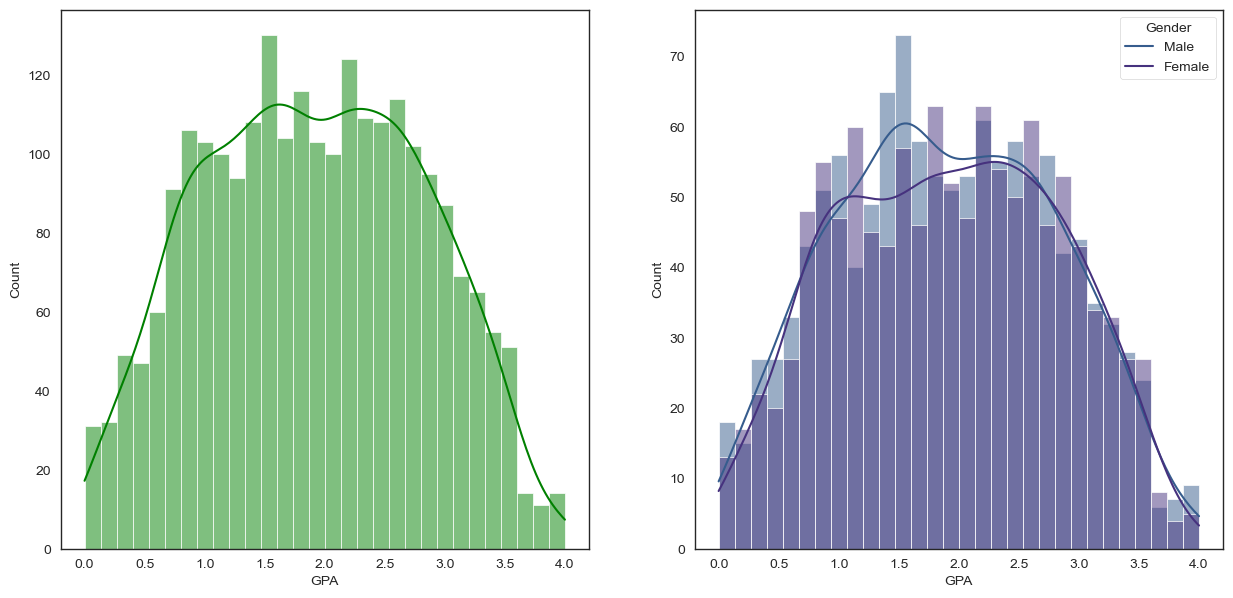

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='GPA',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='GPA',bins=30,kde=True,hue='Gender', legend = False)
# Directly set custom labels
labels = custom_labels['Gender']
plt.legend(title='Gender', loc='upper right', labels=labels)
plt.show()